# Useful librairies

In [85]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from datetime import date, timedelta

matplotlib.rcParams["figure.facecolor"] = "white"

# Data Importation

In [2]:
#create a dataframe from the csv file Time_Value_CM.csv 
df = pd.read_csv('Time_Value_CM.csv', names=['Date', 'Value'])
df.head()

,Date,Value
0,2022-05-02T00:01:00Z,178961.742
1,2022-05-02T00:02:00Z,170609.878
2,2022-05-02T00:03:00Z,168829.864
3,2022-05-02T00:04:00Z,173252.734
4,2022-05-02T00:05:00Z,177271.117


# EDA

## Data Overview

In [3]:
#convert the date column to datetime format 
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%dT%H:%M:%SZ")
df.sort_values(by='Date', inplace=True)

In [4]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_of_week'] = df['Date'].dt.dayofweek.astype(int)
df['Hour'] = df['Date'].dt.hour
df['Minute'] = df['Date'].dt.minute
df['Second'] = df['Date'].dt.second

In [5]:
df.head()

,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Second
79143,2022-02-18 15:39:00,212141.645,2022,2,18,4,15,39,0
79144,2022-02-18 15:40:00,216980.618,2022,2,18,4,15,40,0
79145,2022-02-18 15:41:00,219702.692,2022,2,18,4,15,41,0
79146,2022-02-18 15:42:00,218002.962,2022,2,18,4,15,42,0
79147,2022-02-18 15:43:00,219366.764,2022,2,18,4,15,43,0


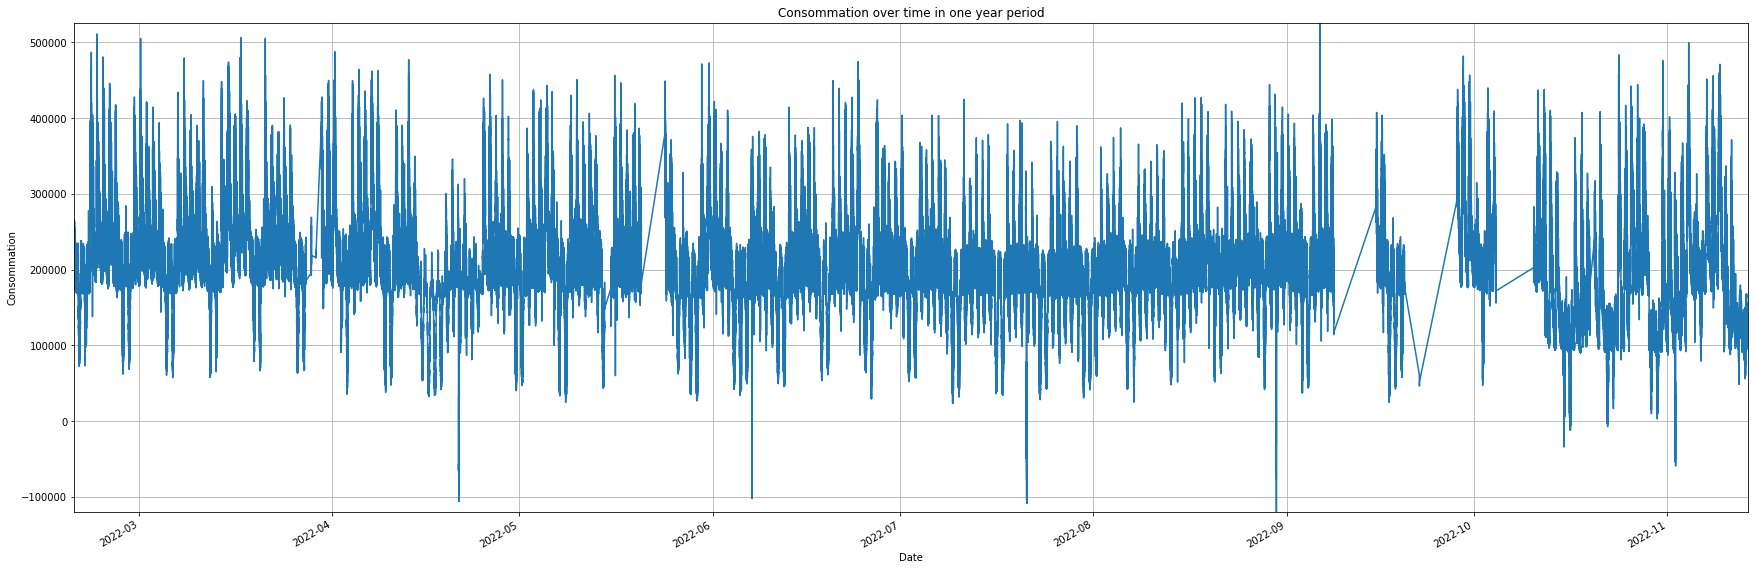

In [6]:
def plot_consommation_over_time_detailed_graph(): 
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'])
    ax.set_title('Consommation over time in one year period')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_detailed_graph()

In [7]:
sdate = date(2022,2,19) 
edate = date(2022,11,13)
all_days = pd.date_range(sdate,edate-timedelta(days=1),freq='d')
all_days = pd.to_datetime(all_days, format="%Y-%m-%d")

In [8]:
days_missing = []
for x in all_days:
    month_x = x.month
    day_x = x.day
    if (df.loc[(df.Month == month_x) & (df.Day == day_x)].shape[0] == 0) :
        days_missing.append(x)

In [9]:
missing_perc = round((len(days_missing)*100)/len(all_days), 2)
print("We have ", missing_perc, "% of complete days missing values.")

We have  7.87 % of complete days missing values.


In [10]:
for miss_day in days_missing:
    prev_week = miss_day - dt.timedelta(days = 7)
    next_week = miss_day + dt.timedelta(days = 7)
    if (df.loc[(df.Month == prev_week.month) & (df.Day == prev_week.day)].shape[0] != 0) :
        df_concat = df.loc[(df.Month == prev_week.month) & (df.Day == prev_week.day)]
        df_concat["Date"] = df_concat["Date"] + dt.timedelta(days = 7)
        df = pd.concat([df, df_concat], ignore_index=True)
    else: 
        if (df.loc[(df.Month == next_week.month) & (df.Day == next_week.day)].shape[0] != 0) :
            df_concat = df.loc[(df.Month == next_week.month) & (df.Day == next_week.day)]
            df_concat["Date"] = df_concat["Date"] - dt.timedelta(days = 7)
            df = pd.concat([df, df_concat], ignore_index=True)

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_10304\3680481499.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat["Date"] = df_concat["Date"] + dt.timedelta(days = 7)
C:\Users\Kelyan\AppData\Local\Temp\ipykernel_10304\3680481499.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat["Date"] = df_concat["Date"] - dt.timedelta(days = 7)


In [11]:
days_missing = []
for x in all_days:
    month_x = x.month
    day_x = x.day
    if (df.loc[(df.Month == month_x) & (df.Day == day_x)].shape[0] == 0) :
        days_missing.append(x)

In [12]:
missing_perc = round((len(days_missing)*100)/len(all_days), 2)
print("We now have", missing_perc, "% of complete days missing values.")

We now have 7.87 % of complete days missing values.


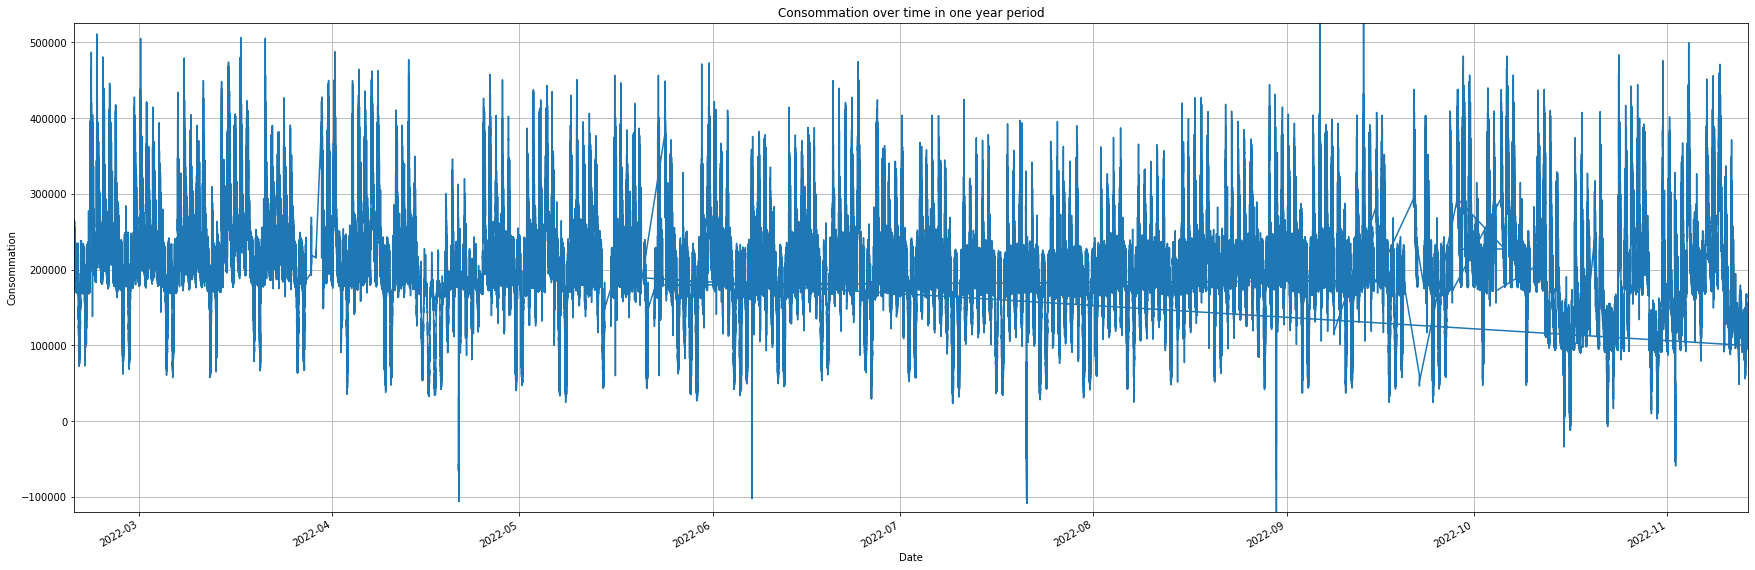

In [13]:
def plot_consommation_over_time_detailed_graph(): 
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'])
    ax.set_title('Consommation over time in one year period')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_detailed_graph()

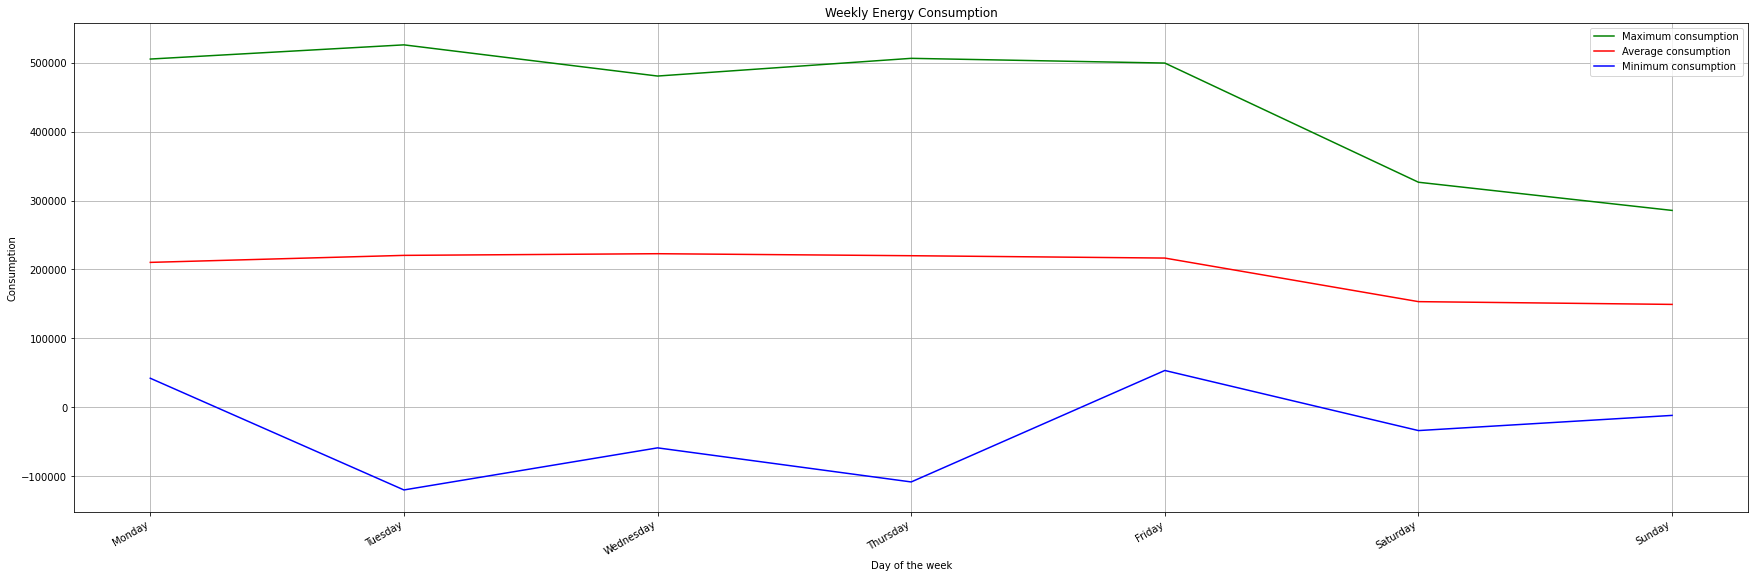

In [14]:
# function to plot the first week 
def plot_weekly_consumption():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df["Value"].groupby(df["Day_of_week"]).max().index, df["Value"].groupby(df["Day_of_week"]).max().values, color= "g", label= "Maximum consumption")
    ax.plot(df["Value"].groupby(df["Day_of_week"]).mean().index, df["Value"].groupby(df["Day_of_week"]).mean().values, color= "r", label= "Average consumption")
    ax.plot(df["Value"].groupby(df["Day_of_week"]).min().index, df["Value"].groupby(df["Day_of_week"]).min().values, color= "b", label= "Minimum consumption")
    ax.set_title('Weekly Energy Consumption')
    ax.set_xlabel('Day of the week')
    ax.set_ylabel('Consumption')
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.xticks([0, 1, 2, 3, 4, 5, 6], ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
    plt.show()

plot_weekly_consumption()

## Weekend vs Weekdays

In [15]:
#add a column to datafame with 1 if it is a weekend day and 0 if it is a weekday
df['Weekend'] = df['Date'].dt.dayofweek.isin([5,6]).astype(int)
df.tail()

,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Second,Weekend
389701,2022-10-09 23:55:00,175981.611,2022,10,2,6,23,55,0,1
389702,2022-10-09 23:56:00,177323.720,2022,10,2,6,23,56,0,1
389703,2022-10-09 23:57:00,180286.928,2022,10,2,6,23,57,0,1
389704,2022-10-09 23:58:00,177185.770,2022,10,2,6,23,58,0,1
389705,2022-10-09 23:59:00,178345.506,2022,10,2,6,23,59,0,1


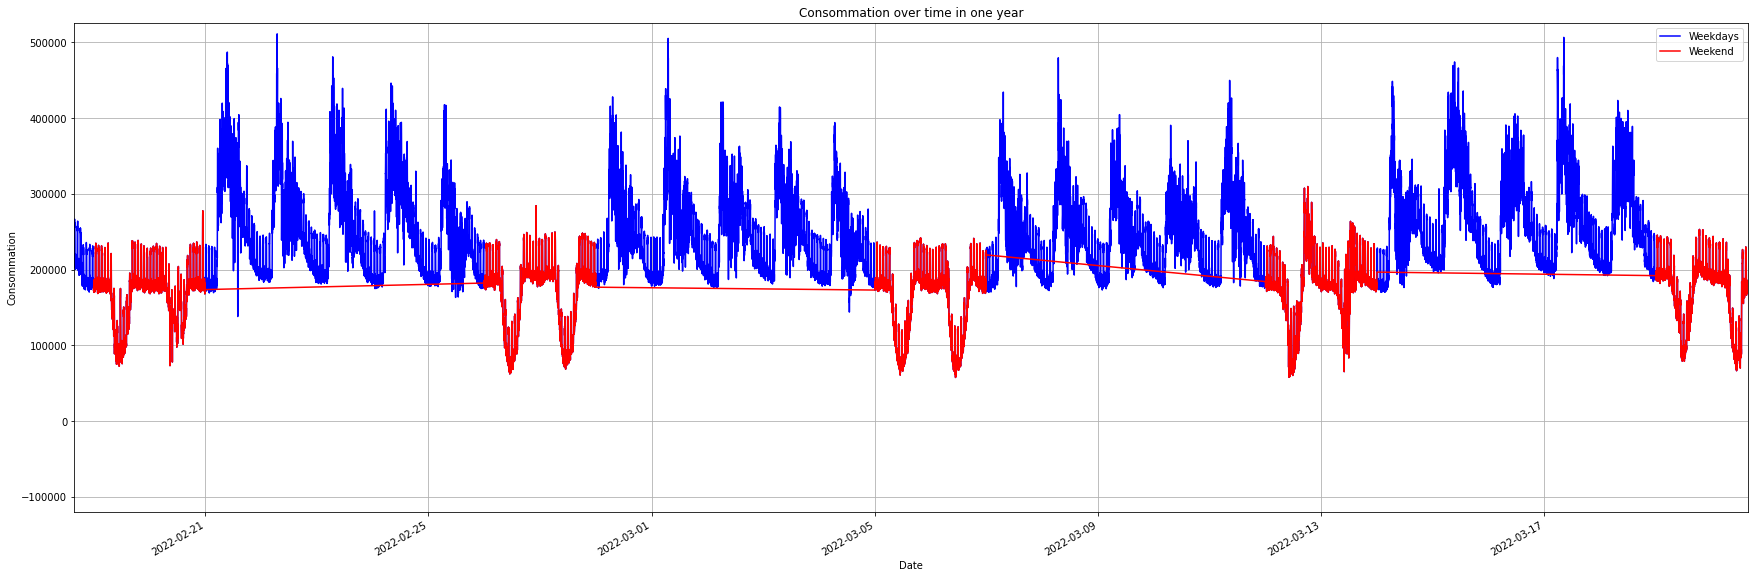

In [16]:
#function to plot the value with another color for the weekend days 
def plot_consommation_over_time_weekend():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'], color='blue', label= "Weekdays")
    ax.plot(df[df['Weekend'] == 1]['Date'], df[df['Weekend'] == 1]['Value'], color='red', label= "Weekend")
    ax.set_title('Consommation over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].min() + pd.Timedelta(days=30))
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    fig.autofmt_xdate()
    ax.legend()
    plt.show()
plot_consommation_over_time_weekend()

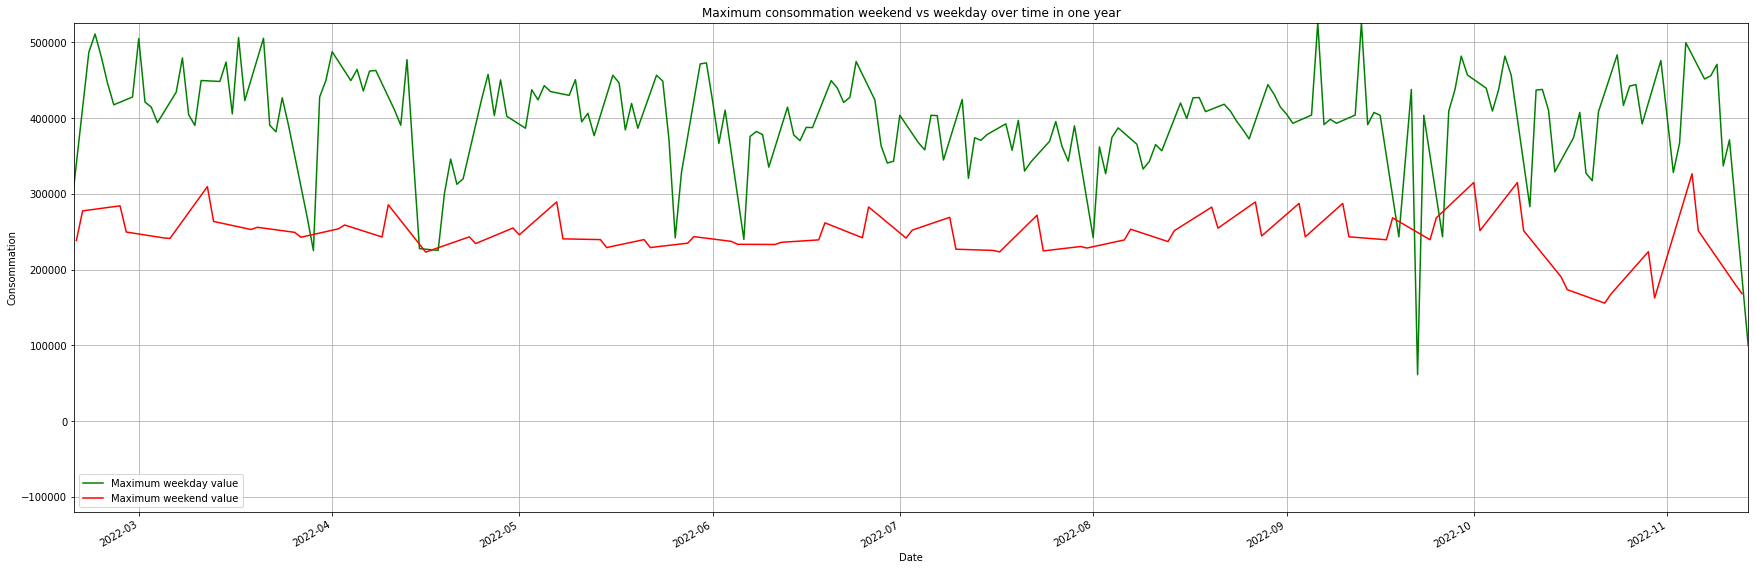

In [17]:
def plot_consommation_over_time_weekend_vs_weekday():
    fig, ax = plt.subplots(figsize=(30, 10))
    #ax.plot(df['Date'], df['Value'], color='blue')
    #ax.plot(df[df['Winter'] == 1]['Date'], df[df['Winter'] == 1]['Value'], color='red')
    ax.plot(df[df['Weekend'] == 0].groupby(df['Date'].dt.date)['Value'].max(), color='green', label="Maximum weekday value")
    ax.plot(df[df['Weekend'] == 1].groupby(df['Date'].dt.date)['Value'].max(), color='red', label="Maximum weekend value")
    ax.set_title('Maximum consommation weekend vs weekday over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_weekend_vs_weekday()

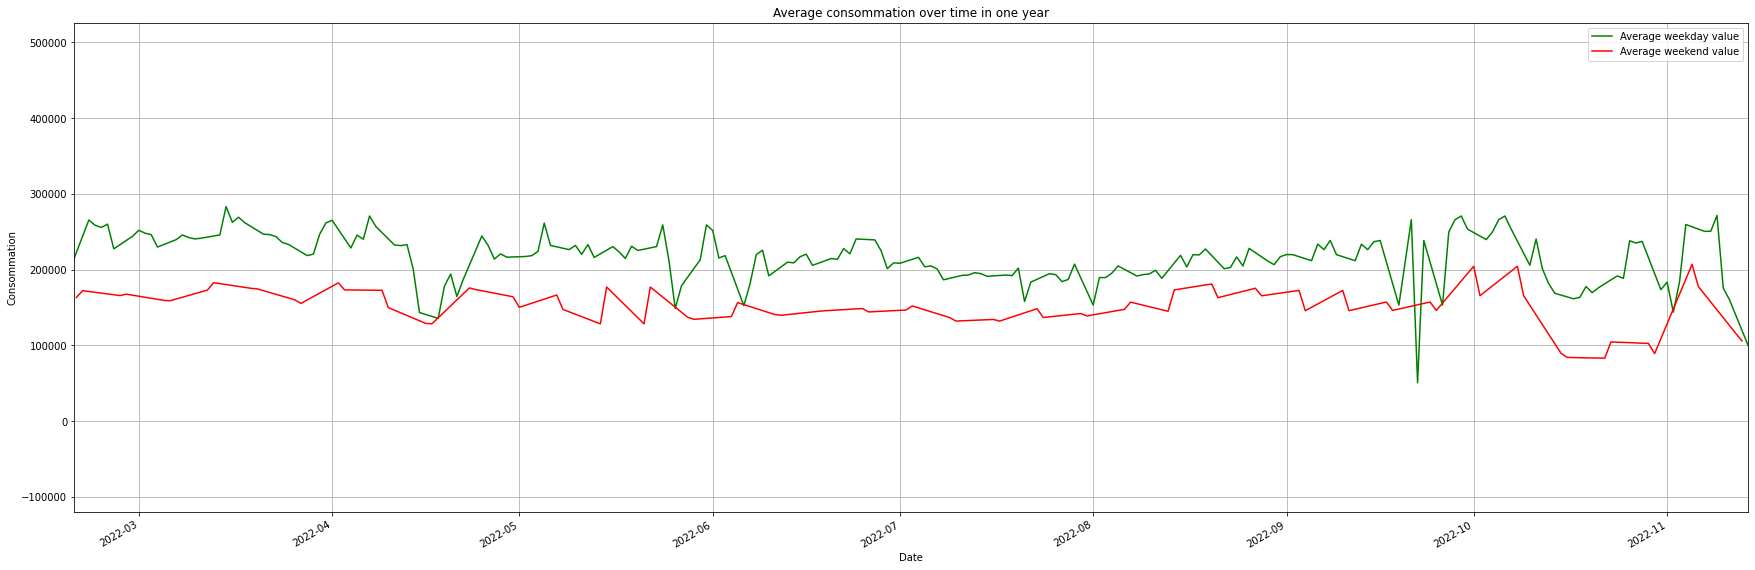

In [18]:
def plot_consommation_over_time_winter_peak():
    fig, ax = plt.subplots(figsize=(30, 10))
    #ax.plot(df['Date'], df['Value'], color='blue')
    #ax.plot(df[df['Winter'] == 1]['Date'], df[df['Winter'] == 1]['Value'], color='red')
    ax.plot(df[df['Weekend'] == 0].groupby(df['Date'].dt.date)['Value'].mean(), color='green', label="Average weekday value")
    ax.plot(df[df['Weekend'] == 1].groupby(df['Date'].dt.date)['Value'].mean(), color='red', label="Average weekend value")
    ax.set_title('Average consommation over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_winter_peak()

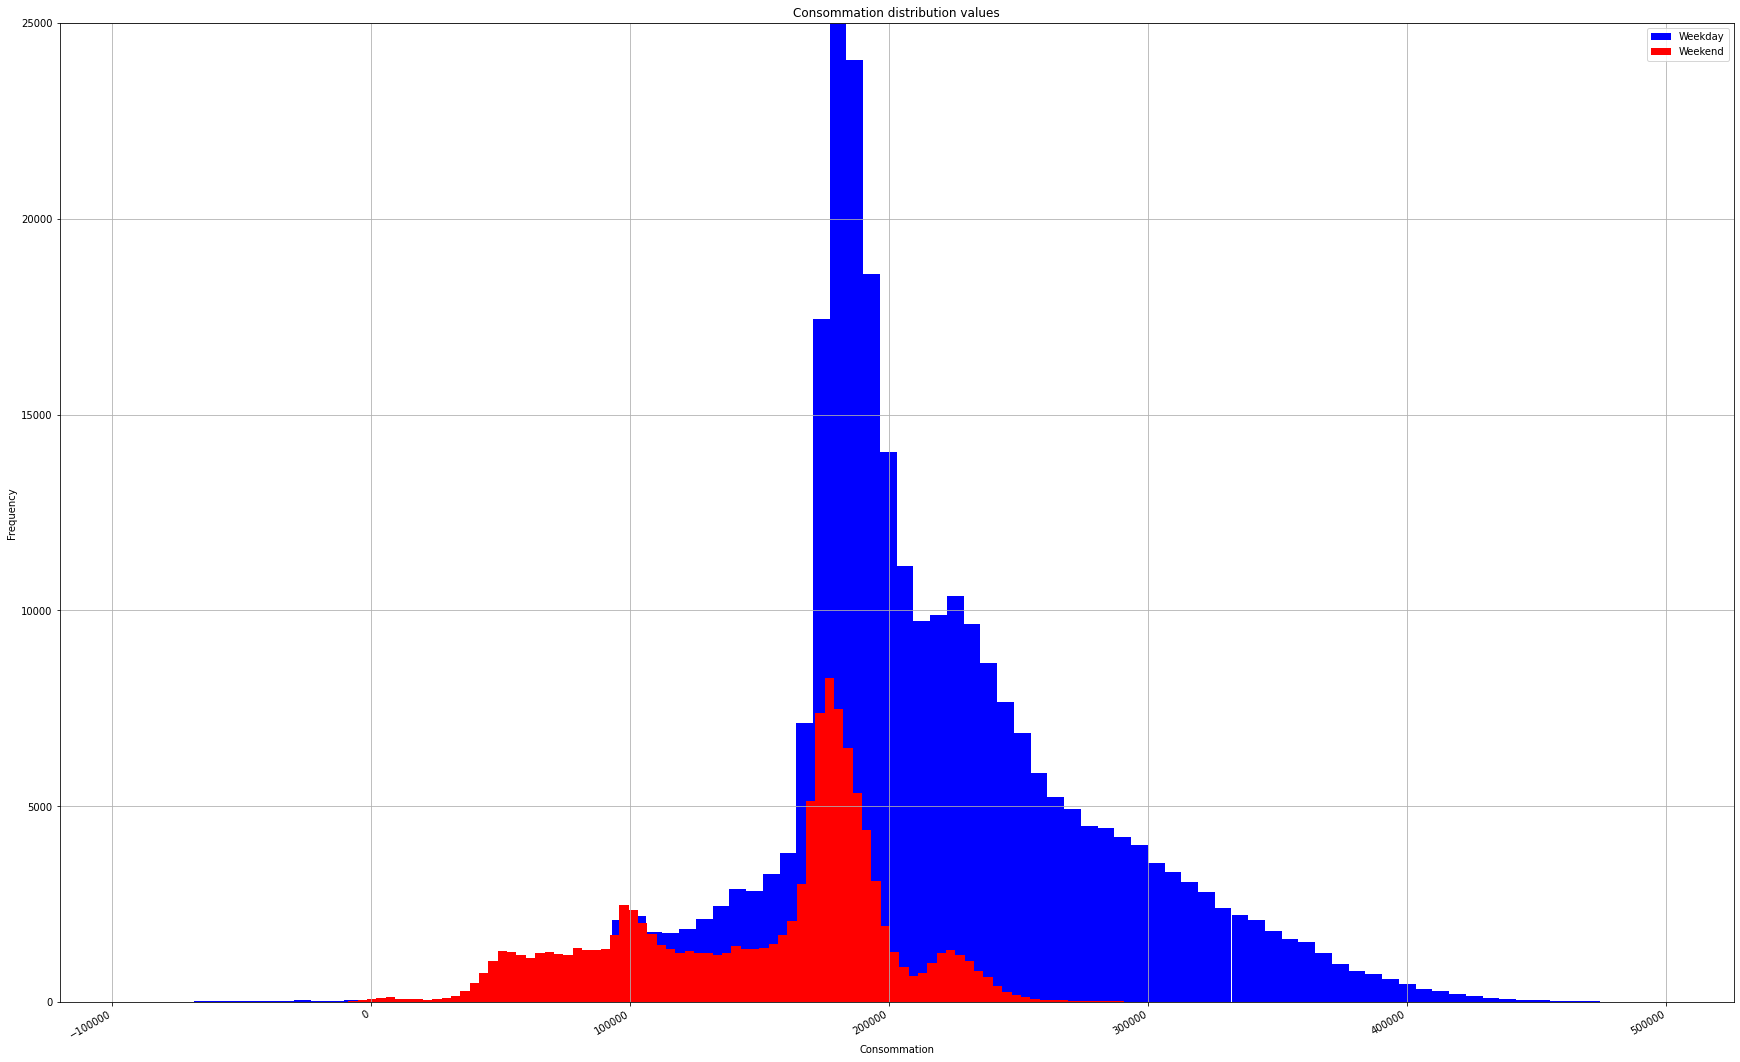

In [19]:
def plot_consommation_over_time_weekend_distribution():
    fig, ax = plt.subplots(figsize=(30, 20))
    ax.hist(df[df['Weekend'] == 0]['Value'], bins=100, color='blue', label= "Weekday")
    ax.hist(df[df['Weekend'] == 1]['Value'], bins=100, color='red', label= "Weekend")
    ax.set_title('Consommation distribution values')
    ax.set_xlabel('Consommation')
    ax.set_ylabel('Frequency')
    ax.set_xlim(df['Value'].min(), df['Value'].max())
    ax.set_ylim(0, 25000)
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()

    plt.show()

plot_consommation_over_time_weekend_distribution()

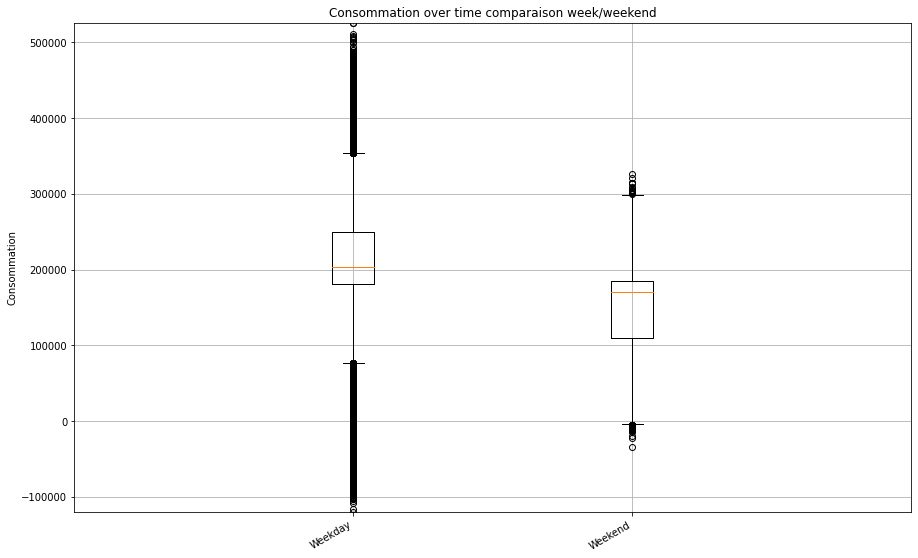

In [20]:
def plot_consommation_over_time_weekend_boxplot():
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.boxplot([df[df['Weekend'] == 0]['Value'], df[df['Weekend'] == 1]['Value']])
    ax.set_title('Consommation over time comparaison week/weekend')
    ax.set_ylabel('Consommation')
    ax.set_xlim(0, 3)
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    plt.xticks([1, 2], ['Weekday', 'Weekend'])
    fig.autofmt_xdate()

    plt.show()

plot_consommation_over_time_weekend_boxplot()

## Winter vs Summer

In [21]:
# winter 1 and summer 0
df['Winter'] = df['Date'].dt.month.isin([11,12,1,2,3]).astype(int)
df.tail()
df.sort_values(by='Date', inplace=True)

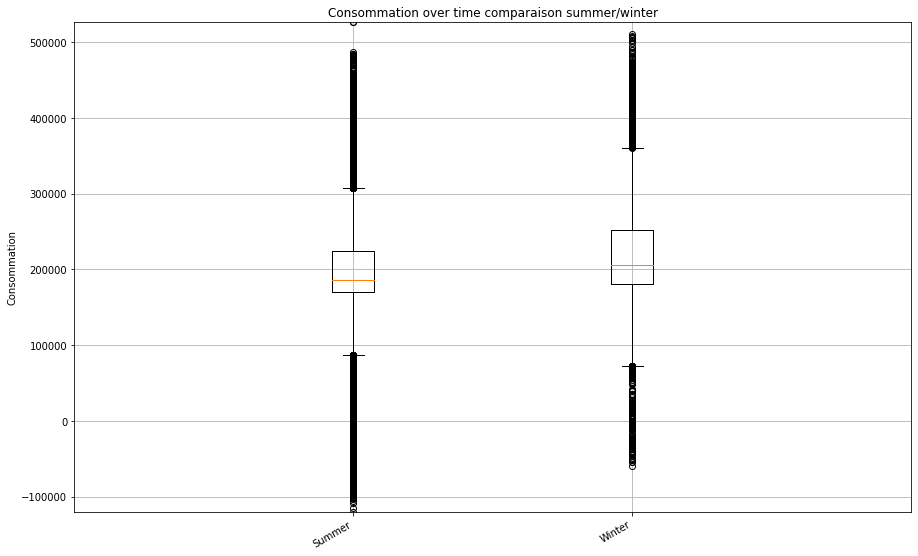

In [22]:
def plot_consommation_over_time_winter_boxplot():
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.boxplot([df[df['Winter'] == 0]['Value'], df[df['Winter'] == 1]['Value']])
    ax.set_title('Consommation over time comparaison summer/winter')
    ax.set_ylabel('Consommation')
    ax.set_xlim(0, 3)
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    plt.xticks([1, 2], ['Summer', 'Winter'])
    fig.autofmt_xdate()

    plt.show()

plot_consommation_over_time_winter_boxplot()

- Train network with temperature input to predict the day ahead

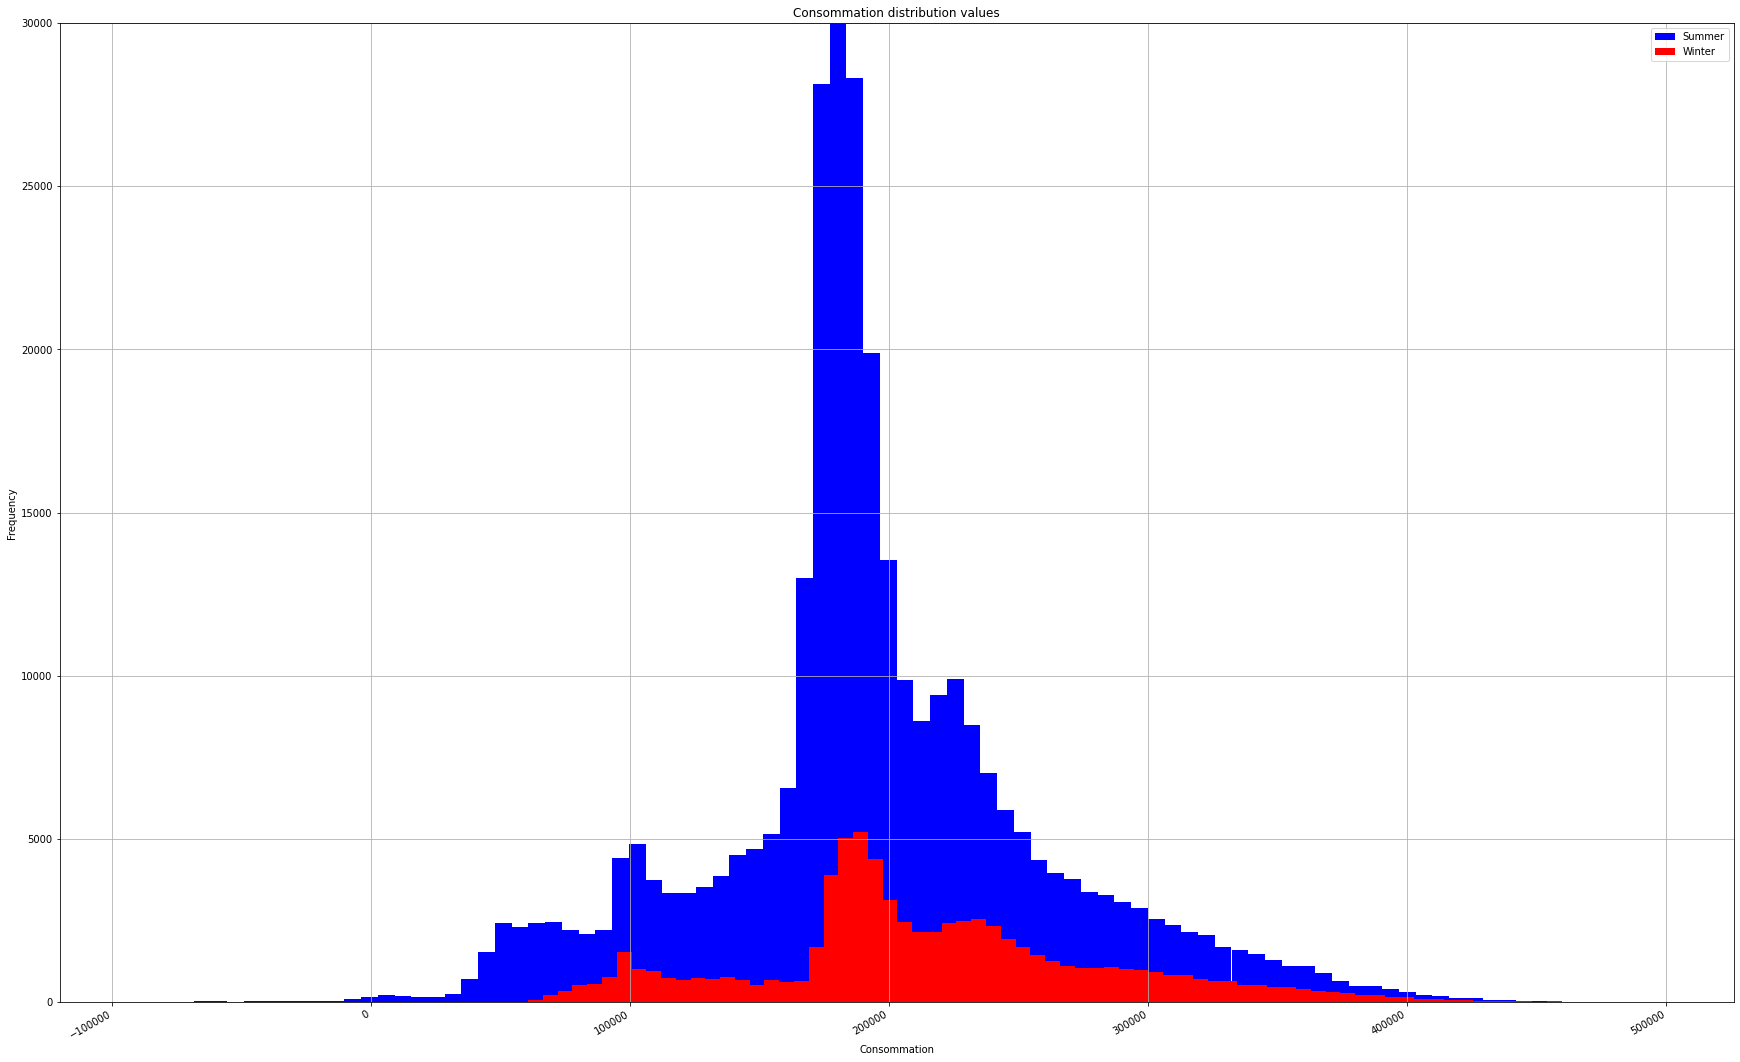

In [23]:
def plot_consommation_over_time_winter_distribution():
    fig, ax = plt.subplots(figsize=(30, 20))
    ax.hist(df[df['Winter'] == 0]['Value'], bins=100, color='blue', label= "Summer")
    ax.hist(df[df['Winter'] == 1]['Value'], bins=100, color='red', label= "Winter")
    ax.set_title('Consommation distribution values')
    ax.set_xlabel('Consommation')
    ax.set_ylabel('Frequency')
    ax.set_xlim(df['Value'].min(), df['Value'].max())
    ax.set_ylim(0, 30000)
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()

    plt.show()

plot_consommation_over_time_winter_distribution()

## Working hours vs Free hours vs Transition morning vs Transition evening

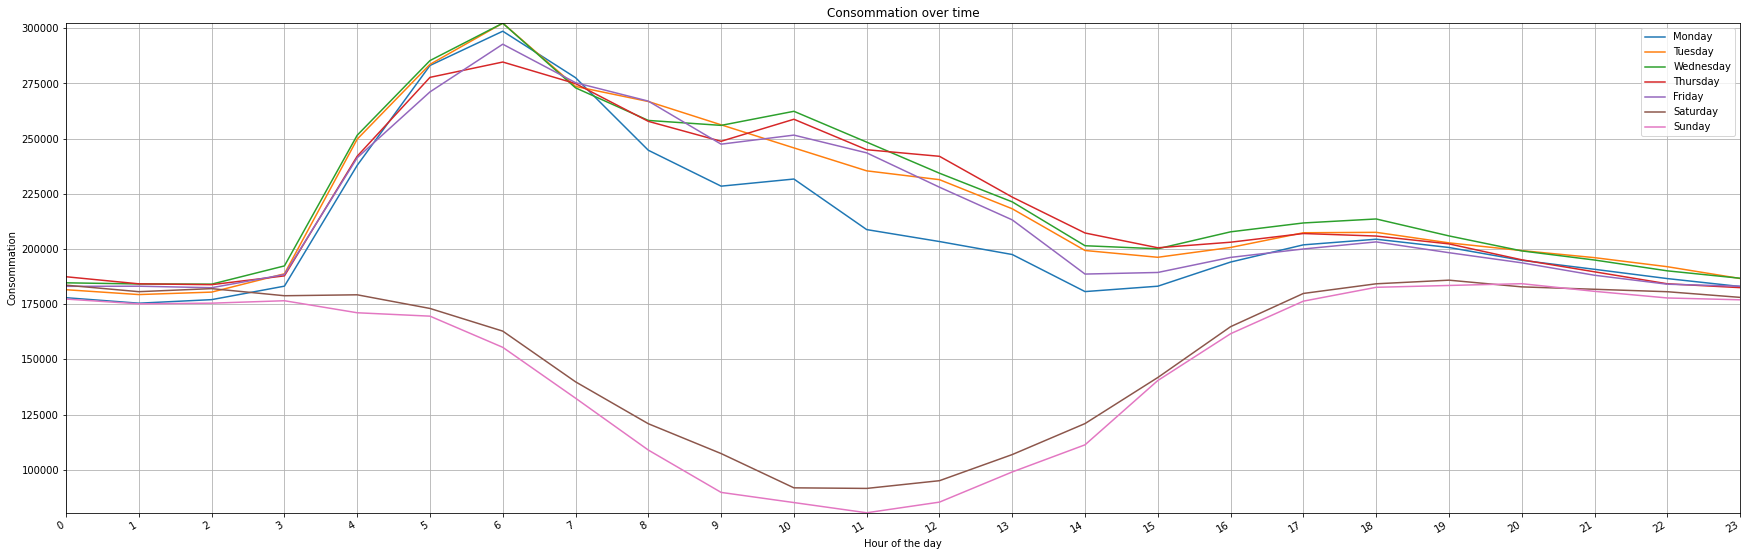

In [24]:

fig, ax = plt.subplots(figsize=(30, 10))

# I want to groupby the day of the week and the hour of the day
# I can't do it directly with the date column, so I create a new column
# with the day of the week and the hour of the day
df['Day of the week'] = df['Date'].dt.dayofweek
df['Hour of the day'] = df['Date'].dt.hour

# I groupby the day of the week and the hour of the day
# and I compute the mean of the value
df_grouped = df.groupby(['Day of the week', 'Hour of the day'])['Value'].mean()
df_grouped = df_grouped.reset_index()

# I plot the mean of the value for each day of the week
for day in range(7):
    ax.plot(df_grouped[df_grouped['Day of the week'] == day]['Hour of the day'], df_grouped[df_grouped['Day of the week'] == day]['Value'], label=day)

ax.set_title('Consommation over time')
ax.set_xlabel('Hour of the day')
ax.set_ylabel('Consommation')
ax.set_xlim(df_grouped['Hour of the day'].min(), df_grouped['Hour of the day'].max())
ax.set_ylim(df_grouped['Value'].min(), df_grouped['Value'].max())
#I want a more detailed x axis
ax.set_xticks(range(24))

ax.grid(True)
# for the legend, I want to display the day of the week
# I use the calendar module to get the day of the week
import calendar
ax.legend([calendar.day_name[day] for day in range(7)])
fig.autofmt_xdate()

plt.show()




In [25]:
df['Working hour'] = ((df['Date'].dt.hour >= 6) & (df['Date'].dt.hour < 15)).astype(int)
df['Transition morning'] = ((df['Date'].dt.hour >= 3) & (df['Date'].dt.hour < 6)).astype(int)
df['Transition evening'] = ((df['Date'].dt.hour >= 15) & (df['Date'].dt.hour < 19)).astype(int)

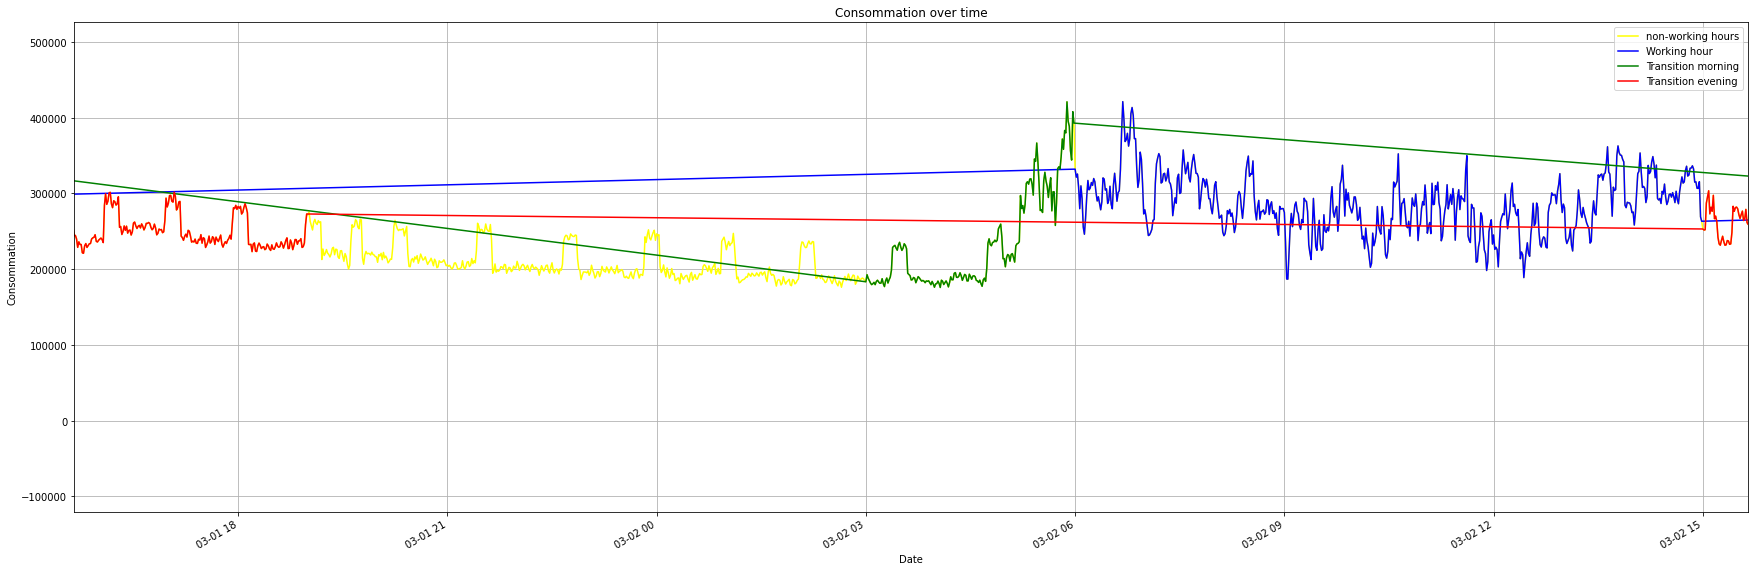

In [26]:
# plot the consommation over time
def plot_day(x):
    fig, ax = plt.subplots(figsize=(30, 10))
    #use a different color for the working hour, transition morning and transition evening
    ax.plot(df['Date'], df['Value'], color='yellow', label='non-working hours')
    ax.plot(df[df['Working hour'] == 1]['Date'], df[df['Working hour'] == 1]['Value'], color='blue', label='Working hour')
    ax.plot(df[df['Transition morning'] == 1]['Date'], df[df['Transition morning'] == 1]['Value'], color='green', label='Transition morning')
    ax.plot(df[df['Transition evening'] == 1]['Date'], df[df['Transition evening'] == 1]['Value'], color='red', label='Transition evening')
    

    ax.set_title('Consommation over time')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    # I want to choose the day to be plotted

    ax.set_xlim(df['Date'].min() + pd.DateOffset(days=x), df['Date'].min()+ pd.DateOffset(days=x+1))
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()

    plt.show()

plot_day(11)


# Data Normalization

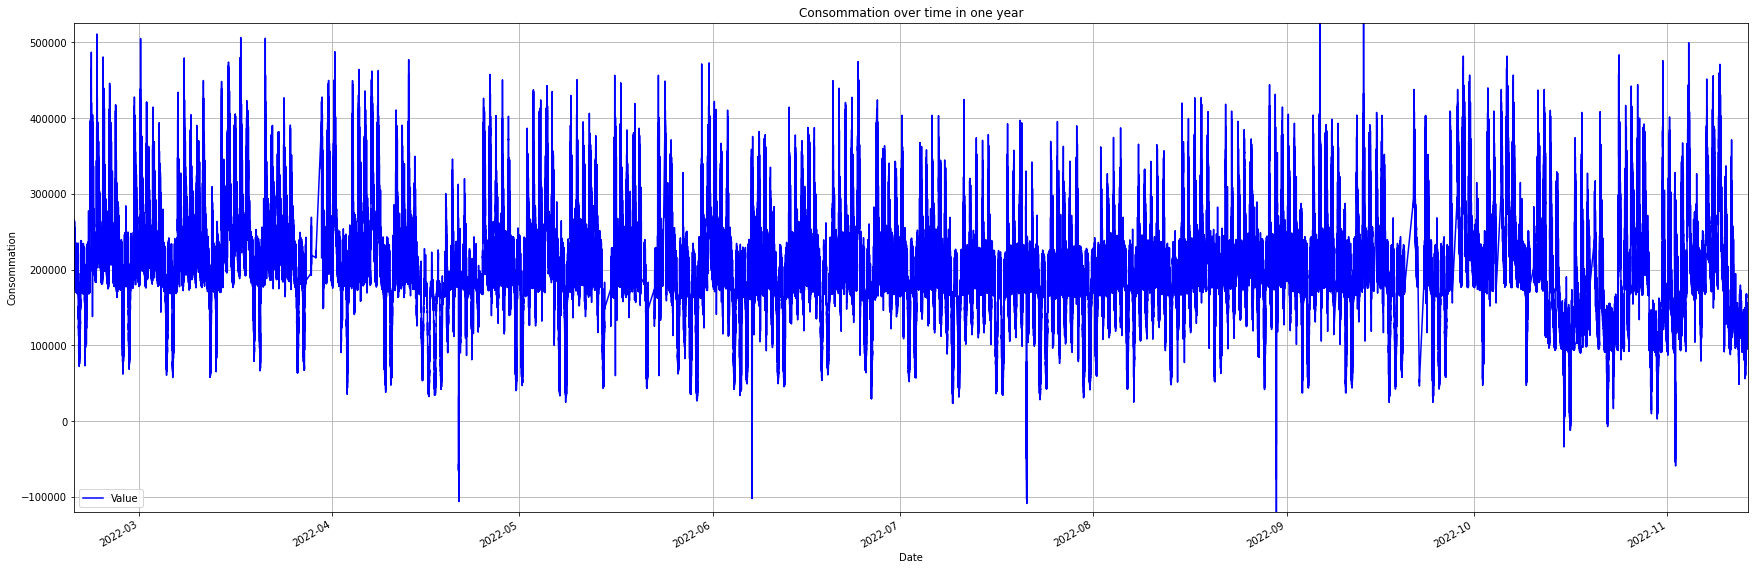

In [27]:
#plot value over time
def plot_consommation_over_time():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'], color='blue', label= "Value")
    ax.set_title('Consommation over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time()

In [28]:
#add a column holiday 1 between 2022-04-20 and 2022-04-28  and specific date 1/08/2022  0 otherwise
df['Holiday'] = (((df['Date'] >= '2022-04-15') & (df['Date'] <= '2022-04-25')) | ((df['Date'] >= '2022-08-01') & (df['Date'] <= '2022-08-01')) | ((df['Date'] >= '2022-09-20') & (df['Date'] <= '2022-09-20')) | ((df['Date'] >= '2022-12-24') & (df['Date'] <= '2022-09-25')) ).astype(int)



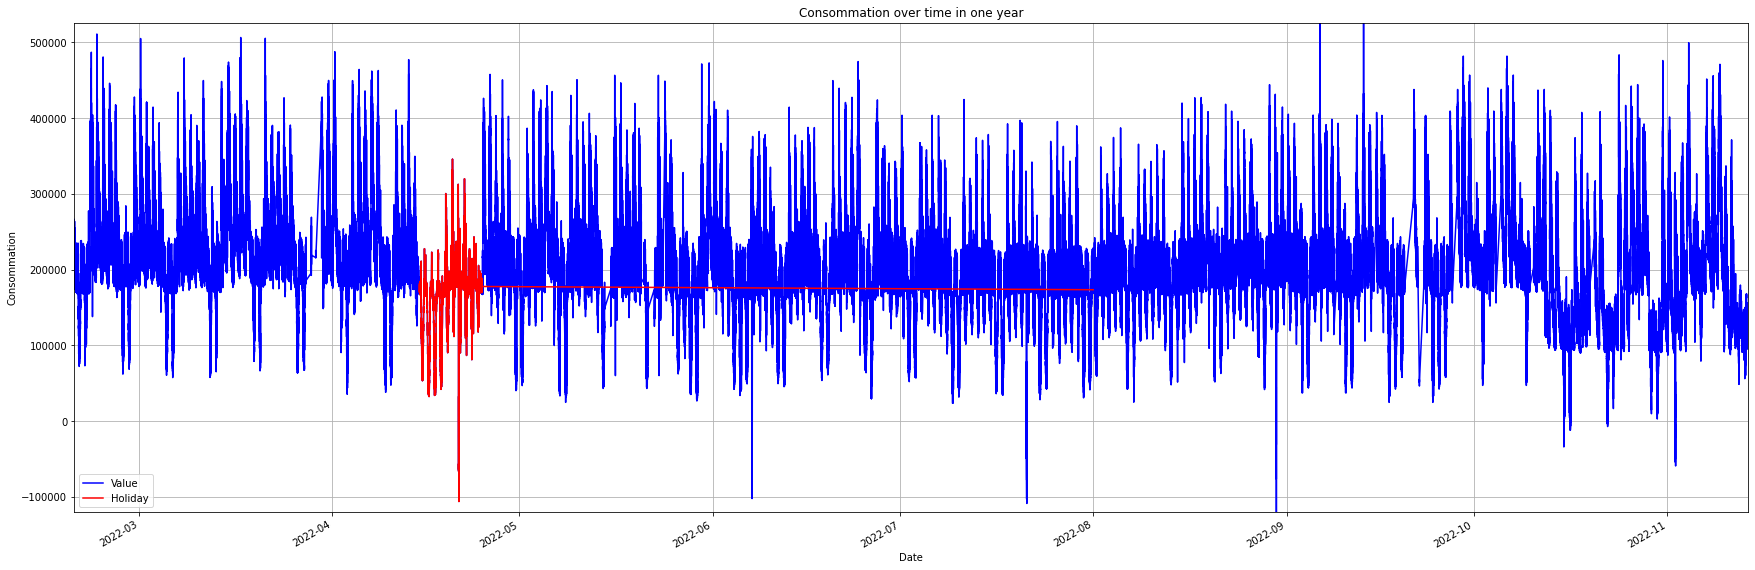

In [29]:
#plot value over time with holidays in anotehr color
def plot_consommation_over_time_holiday():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'], color='blue', label= "Value")
    ax.plot(df[df['Holiday'] == 1]['Date'], df[df['Holiday'] == 1]['Value'], color='red', label= "Holiday")
    ax.set_title('Consommation over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_holiday()

In [30]:
df['Mean'] = df['Value'].mean()
df['Variance'] = df['Value'].var()
df['Normalized'] = (df['Value'] - df['Mean']) / df['Variance']

In [31]:
df.head()

,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Second,Weekend,Winter,Day of the week,Hour of the day,Working hour,Transition morning,Transition evening,Holiday,Mean,Variance,Normalized
0,2022-02-18 15:39:00,212141.645,2022,2,18,4,15,39,0,0,1,4,15,0,0,1,0,198154.523606,4.373071e+09,0.000003
1,2022-02-18 15:40:00,216980.618,2022,2,18,4,15,40,0,0,1,4,15,0,0,1,0,198154.523606,4.373071e+09,0.000004
2,2022-02-18 15:41:00,219702.692,2022,2,18,4,15,41,0,0,1,4,15,0,0,1,0,198154.523606,4.373071e+09,0.000005
3,2022-02-18 15:42:00,218002.962,2022,2,18,4,15,42,0,0,1,4,15,0,0,1,0,198154.523606,4.373071e+09,0.000005
4,2022-02-18 15:43:00,219366.764,2022,2,18,4,15,43,0,0,1,4,15,0,0,1,0,198154.523606,4.373071e+09,0.000005


# Pattern


In [32]:
# df['Peak'] = 0

# #iterate over all the values of the data_frame and every 3600 rows 
# j=0
# k=0
# for i in range(79155, 79155+len(df)):
#     j=j+1
#     if j>67:
#         k=k+1
#         if k != 0:
#             df.loc[i, 'Peak'] = 1
#             if k==12:
#                 k=0
#                 j=0

In [33]:
df['Peak']=0

#if normalized value is greater than 0.3 but smaller than 1, it is a peak but for non working hours
df.loc[(df['Normalized'] > 0.000003) & (df['Normalized'] < 0.00002) & (df['Working hour'] == 0) & (df['Transition evening'] == 0), 'Peak'] = 1



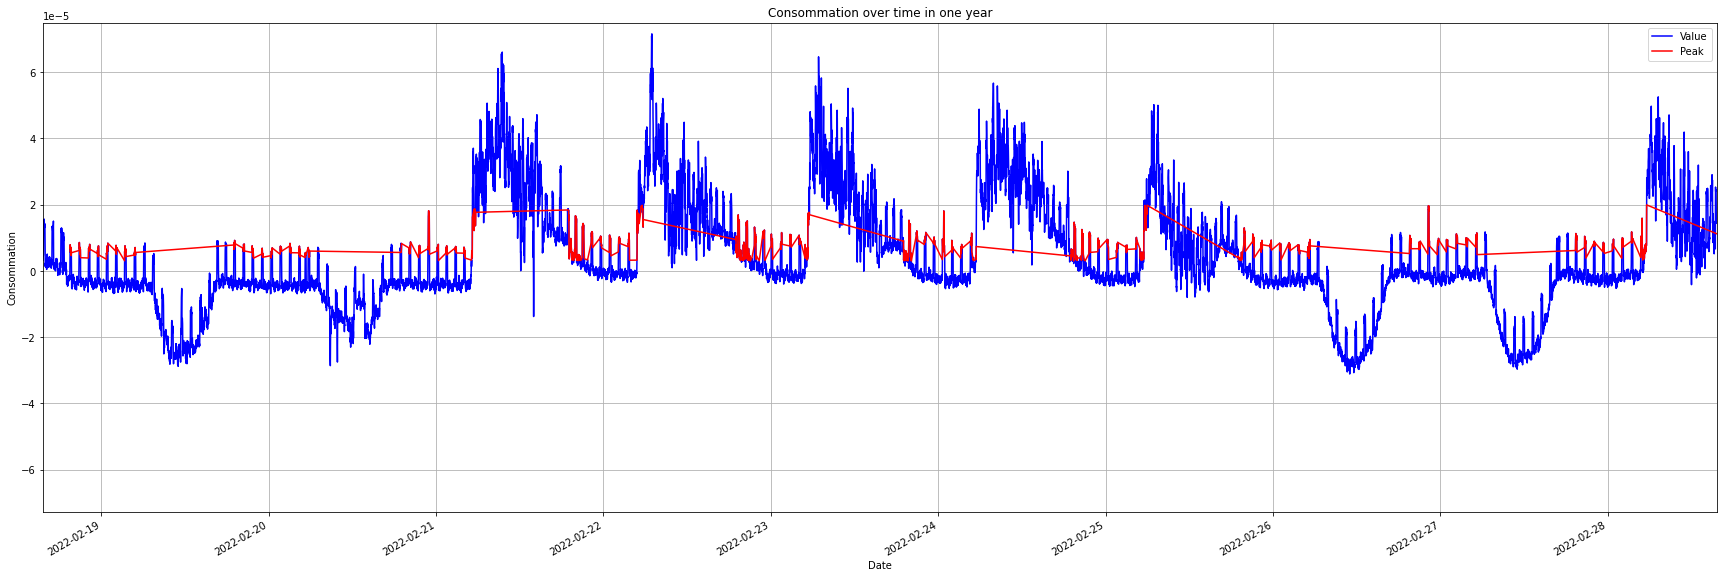

In [34]:
#plot the value with another color for the peak values
def plot_consommation_over_time_peak():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Normalized'], color='blue', label= "Value")
    ax.plot(df[df['Peak'] == 1]['Date'], df[df['Peak'] == 1]['Normalized'], color='red', label= "Peak")
    ax.set_title('Consommation over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].min()+ pd.Timedelta(days=10))
    ax.set_ylim(df['Normalized'].min(), df['Normalized'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_peak()


# Generate Cycle for Dates

In [35]:
def generate_cycle(array, nb_div):
    re_part = np.ones(len(array))
    im_part = np.ones(len(array))

    for k in range(len(array)):
        z = np.exp(array[k]*2j*np.pi/nb_div)
        re_part[k] = np.real(z)
        im_part[k] = np.imag(z)

    return re_part, im_part

In [36]:
def plot_cycle(re_part, im_part, title):
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.plot(re_part, im_part, '+')
    ax.set_title(title)
    ax.set_xlabel('Real Part')
    ax.set_ylabel('Imaginary Part')
    ax.grid(True)
    plt.show()

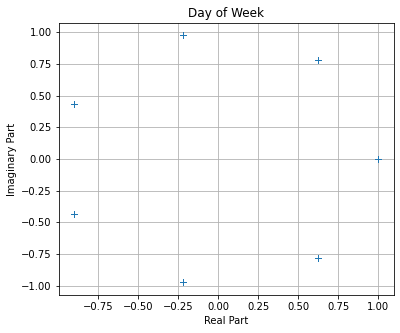

In [37]:
day_of_week_re, day_of_week_im = generate_cycle(df['Day_of_week'].to_numpy(), 7)
plot_cycle(day_of_week_re, day_of_week_im, 'Day of Week')

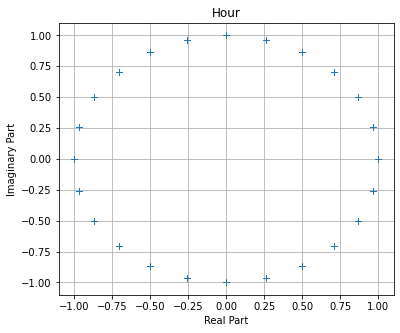

In [38]:
hour_re, hour_im = generate_cycle(df['Hour'].to_numpy(), 24)
plot_cycle(hour_re, hour_im, 'Hour')

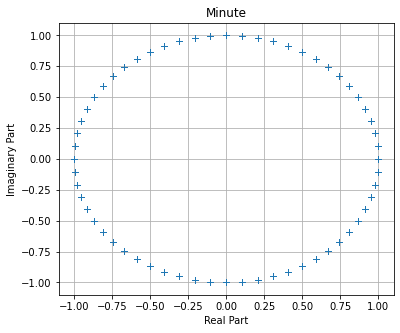

In [39]:
minute_re, minute_im = generate_cycle(df['Minute'].to_numpy(), 60)
plot_cycle(minute_re, minute_im, 'Minute')

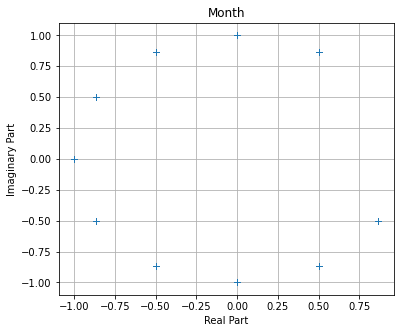

In [40]:
month_re, month_im = generate_cycle(df['Month'].to_numpy(), 12)
plot_cycle(month_re, month_im, 'Month')

In [41]:
def generate_cycle_days(days, months, year):
    re_part = np.ones(len(days))
    im_part = np.ones(len(days))

    lst_31 = [1, 3, 5, 7, 8, 10, 12] # Months with 31 days
    lst_30 = [4, 6, 9, 11] # Months with 30 days

    for k in range(len(days)):
        if months[k] in lst_31:
            nb_div = 31
        elif months[k] in lst_30:
            nb_div = 30
        elif months[k] == 2:
            if (year[k]%4==0 and year[k]%100!=0 or year[k]%400==0):
                nb_div = 29
            else:
                nb_div = 29
        else: 
            print('Error in Months')
            break

        z = np.exp(days[k]*2j*np.pi/nb_div)
        re_part[k] = np.real(z)
        im_part[k] = np.imag(z)

    return re_part, im_part

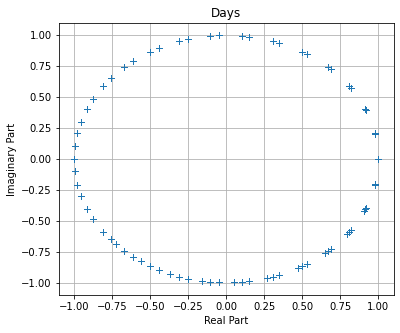

In [42]:
days_re, days_im = generate_cycle_days(df['Day'].to_numpy(), df['Month'].to_numpy(), df['Year'].to_numpy())
plot_cycle(days_re, days_im, 'Days')

In [43]:
param = list(set(list(df.columns)) - set(['Mean', 'Variance', 'Second', 'Year', 'Normalized']))
new_df = df[param]
new_df = new_df.assign(Day_of_Week_re=day_of_week_re.tolist())
new_df = new_df.assign(Day_of_Week_im=day_of_week_im.tolist())
new_df = new_df.assign(Hour_re=hour_re.tolist())
new_df = new_df.assign(Hour_im=hour_im.tolist())
new_df = new_df.assign(Minute_re=minute_re.tolist())
new_df = new_df.assign(Minute_im=minute_im.tolist())
new_df = new_df.assign(Month_re=month_re.tolist())
new_df = new_df.assign(Month_im=month_im.tolist())
new_df = new_df.assign(Day_re=days_re.tolist())
new_df = new_df.assign(Day_im=days_im.tolist())

new_df['Day_of_week']= new_df['Day_of_week']/7


new_df.head()

,Month,Weekend,Day_of_week,Day of the week,Peak,Value,Minute,Transition evening,Day,Winter,...,Day_of_Week_re,Day_of_Week_im,Hour_re,Hour_im,Minute_re,Minute_im,Month_re,Month_im,Day_re,Day_im
0,2,0,0.571429,4,0,212141.645,39,1,18,1,...,-0.900969,-0.433884,-0.707107,-0.707107,-0.587785,-0.809017,0.5,0.866025,-0.725995,-0.687699
1,2,0,0.571429,4,0,216980.618,40,1,18,1,...,-0.900969,-0.433884,-0.707107,-0.707107,-0.500000,-0.866025,0.5,0.866025,-0.725995,-0.687699
2,2,0,0.571429,4,0,219702.692,41,1,18,1,...,-0.900969,-0.433884,-0.707107,-0.707107,-0.406737,-0.913545,0.5,0.866025,-0.725995,-0.687699
3,2,0,0.571429,4,0,218002.962,42,1,18,1,...,-0.900969,-0.433884,-0.707107,-0.707107,-0.309017,-0.951057,0.5,0.866025,-0.725995,-0.687699
4,2,0,0.571429,4,0,219366.764,43,1,18,1,...,-0.900969,-0.433884,-0.707107,-0.707107,-0.207912,-0.978148,0.5,0.866025,-0.725995,-0.687699


# Add mean of values

# Add temperature

In [44]:
df_temp = pd.read_csv('temperature_data.csv', sep=';', names= ['Station','Date', 'Temperature'])

In [45]:
df_temp.head()

,Station,Date,Temperature
0,Station,Date,Temperature
1,WSLLAF,202201010000,8.6
2,WSLLAF,202201010010,8.7
3,WSLLAF,202201010020,8.7
4,WSLLAF,202201010030,8.9


In [46]:
df_temp = df_temp.drop(df.index[0])

In [47]:
#drop the station column
df_temp = df_temp.drop(['Station'], axis=1)

In [48]:
df_temp.head()

,Date,Temperature
1,202201010000,8.6
2,202201010010,8.7
3,202201010020,8.7
4,202201010030,8.9
5,202201010040,8.6


In [49]:
df_temp['Date'] = pd.to_datetime(df_temp['Date'], format='%Y%m%d%H%M')
df_temp.head()

,Date,Temperature
1,2022-01-01 00:00:00,8.6
2,2022-01-01 00:10:00,8.7
3,2022-01-01 00:20:00,8.7
4,2022-01-01 00:30:00,8.9
5,2022-01-01 00:40:00,8.6


In [50]:
df_nan= df_temp[df_temp['Temperature']=='-']
df_nan = df_nan.replace('-', np.nan)
df_nan_index = df_nan.index.tolist()
# replace these specific indexes in the original df by nan values
df_temp.loc[df_nan_index, 'Temperature'] = np.nan

In [51]:
df_temp.head()
df_temp['Temperature'] = df_temp['Temperature'].astype(float)

#add between each data the missing values for the minute
df_temp = df_temp.set_index('Date')
df_temp = df_temp.resample('1min').asfreq()
df_temp = df_temp.reset_index()

df_temp.head()

,Date,Temperature
0,2022-01-01 00:00:00,8.6
1,2022-01-01 00:01:00,NaN
2,2022-01-01 00:02:00,NaN
3,2022-01-01 00:03:00,NaN
4,2022-01-01 00:04:00,NaN


In [52]:
# for the nan values we will use the first value before the nan value that is not nan
df_temp['Temperature'] = df_temp['Temperature'].fillna(method='ffill')
df_temp.head()

,Date,Temperature
0,2022-01-01 00:00:00,8.6
1,2022-01-01 00:01:00,8.6
2,2022-01-01 00:02:00,8.6
3,2022-01-01 00:03:00,8.6
4,2022-01-01 00:04:00,8.6


In [53]:
print(new_df['Date'].min())
print(new_df['Date'].max())

2022-02-18 15:39:00
2022-11-14 00:00:00


In [54]:
#crop the temperature data to the same period as the consumption data
df_temp = df_temp[(df_temp['Date'] >= new_df['Date'].min()) & (df_temp['Date'] <= new_df['Date'].max())]

In [55]:
#normalize the temperature using mean and standard deviation
df_temp['Temperature'] = (df_temp['Temperature'] - df_temp['Temperature'].min()) / (df_temp['Temperature'].max() - df_temp['Temperature'].min())

# Add GHI

In [56]:
df_irr = pd.read_csv('radiation_data.csv', sep=';')
df_irr = df_irr.drop(df_irr.columns[0], axis=1)
df_irr['Date'] = pd.to_datetime(df_irr['Date'], format='%Y%m%d%H%M')
df_irr.head()

,Date,Irradiance
0,2022-01-01 00:00:00,0
1,2022-01-01 00:10:00,0
2,2022-01-01 00:20:00,0
3,2022-01-01 00:30:00,0
4,2022-01-01 00:40:00,0


In [57]:
df_nan= df_irr[df_irr['Irradiance']=='-']
df_nan = df_nan.replace('-', np.nan)
df_nan_index = df_nan.index.tolist()
# replace these specific indexes in the original df by nan values
df_irr.loc[df_nan_index, 'Irradiance'] = np.nan

In [58]:
df_irr.head()
#df_irr['Irradiance'] = df_irr['Irradiance'].astype(float)

#add between each data the missing values for the minute
df_irr = df_irr.set_index('Date')
df_irr = df_irr.resample('1min').asfreq()
df_irr = df_irr.reset_index()

# convert Irradiance to float
df_irr['Irradiance'] = df_irr['Irradiance'].str.replace(',', '.').astype(float)
df_irr.head()

,Date,Irradiance
0,2022-01-01 00:00:00,0.0
1,2022-01-01 00:01:00,NaN
2,2022-01-01 00:02:00,NaN
3,2022-01-01 00:03:00,NaN
4,2022-01-01 00:04:00,NaN


In [59]:
# for the nan values we will use the first value before the nan value that is not nan
df_irr['Irradiance'] = df_irr['Irradiance'].fillna(method='ffill')


In [60]:
df_irr = df_irr[(df_irr['Date'] >= new_df['Date'].min()) & (df_irr['Date'] <= new_df['Date'].max())]

In [61]:
df_irr.head()

,Date,Irradiance
70059,2022-02-18 15:39:00,134.0
70060,2022-02-18 15:40:00,134.0
70061,2022-02-18 15:41:00,134.0
70062,2022-02-18 15:42:00,134.0
70063,2022-02-18 15:43:00,134.0


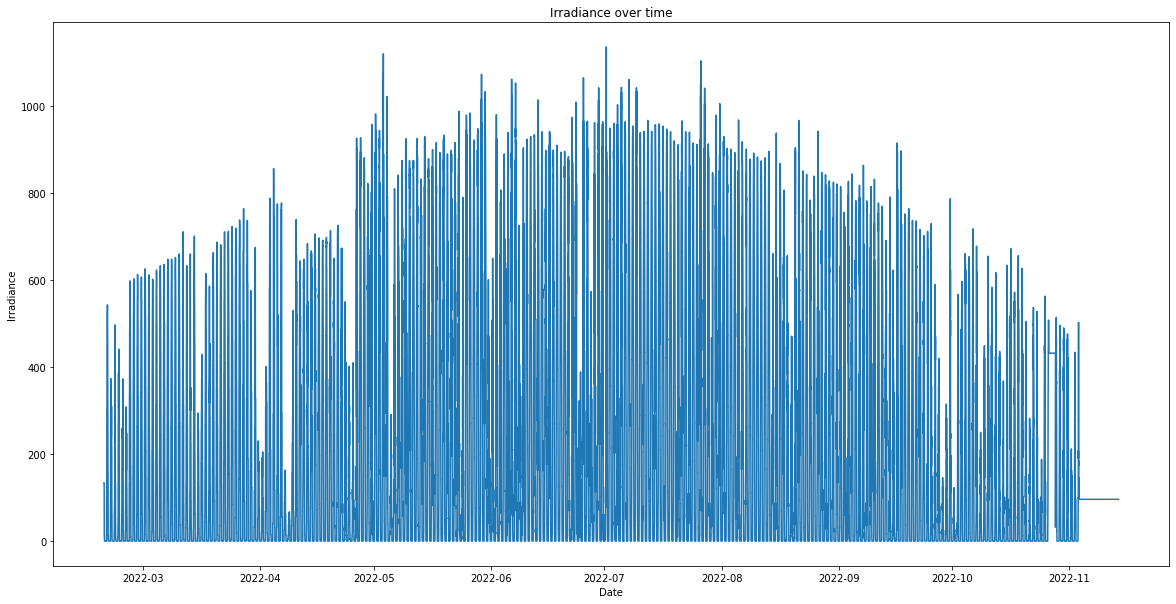

In [62]:
#plot the irradiance over time to see the trend 
plt.figure(figsize=(20,10))
plt.plot(df_irr['Date'], df_irr['Irradiance'])
plt.title('Irradiance over time')
plt.xlabel('Date')
plt.ylabel('Irradiance')
plt.show()


In [63]:
#normalize the irradiance using mean and standard deviation
df_irr['Irradiance'] = (df_irr['Irradiance'] - df_irr['Irradiance'].min()) / (df_irr['Irradiance'].max() - df_irr['Irradiance'].min())

In [64]:
#merge new_df with the temperature and irradiance data with respect to the date
new_df = pd.merge(new_df, df_temp, on='Date')
new_df = pd.merge(new_df, df_irr, on='Date')

new_df.head()


,Month,Weekend,Day_of_week,Day of the week,Peak,Value,Minute,Transition evening,Day,Winter,...,Hour_re,Hour_im,Minute_re,Minute_im,Month_re,Month_im,Day_re,Day_im,Temperature,Irradiance
0,2,0,0.571429,4,0,212141.645,39,1,18,1,...,-0.707107,-0.707107,-0.587785,-0.809017,0.5,0.866025,-0.725995,-0.687699,0.451948,0.117958
1,2,0,0.571429,4,0,216980.618,40,1,18,1,...,-0.707107,-0.707107,-0.500000,-0.866025,0.5,0.866025,-0.725995,-0.687699,0.451948,0.117958
2,2,0,0.571429,4,0,219702.692,41,1,18,1,...,-0.707107,-0.707107,-0.406737,-0.913545,0.5,0.866025,-0.725995,-0.687699,0.451948,0.117958
3,2,0,0.571429,4,0,218002.962,42,1,18,1,...,-0.707107,-0.707107,-0.309017,-0.951057,0.5,0.866025,-0.725995,-0.687699,0.451948,0.117958
4,2,0,0.571429,4,0,219366.764,43,1,18,1,...,-0.707107,-0.707107,-0.207912,-0.978148,0.5,0.866025,-0.725995,-0.687699,0.451948,0.117958


# Modeling with ANN

In [71]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [72]:
#normalize  columns hour minute day of week and month
new_df['Hour'] = (new_df['Hour'] - new_df['Hour'].min()) / (new_df['Hour'].max() - new_df['Hour'].min())
new_df['Minute'] = (new_df['Minute'] - new_df['Minute'].min()) / (new_df['Minute'].max() - new_df['Minute'].min())
new_df['Day_of_week'] = (new_df['Day_of_week'] - new_df['Day_of_week'].min()) / (new_df['Day_of_week'].max() - new_df['Day_of_week'].min())
new_df['Month'] = (new_df['Month'] - new_df['Month'].min()) / (new_df['Month'].max() - new_df['Month'].min())



In [73]:
target_column = ['Value']
predictors = list(set(list(new_df.columns)) - set(target_column))


X = new_df[predictors]
y = new_df[target_column]
# Split into 70% train and 30% test not random to keep the time order
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [74]:
#create new datafram X_train and X-test without column date
X_train_ = X_train.drop(['Date'], axis=1)
X_test_ = X_test.drop(['Date'], axis=1)

In [75]:
X_train_.head()

,Day_of_Week_re,Weekend,Month_im,Day_re,Minute,Transition evening,Minute_re,Day_of_Week_im,Hour,Transition morning,...,Minute_im,Temperature,Irradiance,Winter,Hour_im,Day,Hour of the day,Day_im,Holiday,Working hour
0,-0.900969,0,0.866025,-0.725995,0.661017,1,-0.587785,-0.433884,0.652174,0,...,-0.809017,0.451948,0.117958,1,-0.707107,18,15,-0.687699,0,0
1,-0.900969,0,0.866025,-0.725995,0.677966,1,-0.500000,-0.433884,0.652174,0,...,-0.866025,0.451948,0.117958,1,-0.707107,18,15,-0.687699,0,0
2,-0.900969,0,0.866025,-0.725995,0.694915,1,-0.406737,-0.433884,0.652174,0,...,-0.913545,0.451948,0.117958,1,-0.707107,18,15,-0.687699,0,0
3,-0.900969,0,0.866025,-0.725995,0.711864,1,-0.309017,-0.433884,0.652174,0,...,-0.951057,0.451948,0.117958,1,-0.707107,18,15,-0.687699,0,0
4,-0.900969,0,0.866025,-0.725995,0.728814,1,-0.207912,-0.433884,0.652174,0,...,-0.978148,0.451948,0.117958,1,-0.707107,18,15,-0.687699,0,0


In [76]:
reg_all = MLPRegressor(hidden_layer_sizes=(300, 300, 300), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=400, shuffle=False, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
reg_all.fit(X_train_, y_train)


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Py

MLPRegressor(early_stopping=True, hidden_layer_sizes=(300, 300, 300),
             max_iter=400, shuffle=False)

In [77]:
import joblib
joblib.dump(reg_all, 'model_v1.joblib')

['model_v1.joblib']

In [70]:
# from sklearn.model_selection import GridSearchCV

# # Define the grid of hyperparameters to search
# param_grid = {
#     'hidden_layer_sizes': [(100, 100, 100), (200, 200, 200), (300, 300, 300)],
#     'activation': ['relu', 'tanh', 'logistic'],
#     'learning_rate': ['constant', 'invscaling', 'adaptive'],
#     'learning_rate_init': [0.001, 0.01, 0.1],
#     'momentum': [0.9, 0.99, 0.999]
# }

# # Perform grid search
# reg = MLPRegressor(solver = Adam)
# grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='neg_mean_absolute_error')
# grid_search.fit(X_train_, y_train)

# # Print the best set of hyperparameters
# print(grid_search.best_params_)

In [78]:
y_pred = reg_all.predict(X_test_)

In [79]:
y_test_=y_test
y_pred_=y_pred

In [80]:
# add a column with the date taken from X_test to y_test_ and make sure the date is in the right order
y_test_['Date'] = X_test['Date']
#y_test_ = y_test_.sort_values(by=['Date'])
y_test_.head()
#add a column with the value predicted Y_pred_ to y_test_
y_test_['Value_pred'] = y_pred_
y_test_.head()

,Value,Date,Value_pred
272794,242286.803,2022-08-18 09:50:00,207703.179230
272795,248719.098,2022-08-18 09:51:00,206664.128093
272796,235504.505,2022-08-18 09:52:00,205770.453817
272797,239468.349,2022-08-18 09:53:00,204924.847004
272798,227288.291,2022-08-18 09:54:00,204387.280399


In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Compute the MAE, MSE, and RMSE
mae = mean_absolute_error(y_test_.Value, y_test_.Value_pred)
mse = mean_squared_error(y_test_.Value, y_test_.Value_pred)
rmse = np.sqrt(mse)

# Print the results
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))


MAE: 44915.95
MSE: 3770959305.66
RMSE: 61408.14


In [82]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_.Value, y_test_.Value_pred)

accuracy = r2 * 100

# Print the result
print("Accuracy:", round(accuracy, 2), "%")

Accuracy: 28.99 %


In [83]:
from sklearn.metrics import mean_absolute_percentage_error

# Calculate the mean absolute percentage error
mape = mean_absolute_percentage_error(y_test_.Value, y_test_.Value_pred)
mape = mape*100

# Print the mean absolute percentage error
print("MAPE:", round(mape, 2), "%")

MAPE: 128.21 %


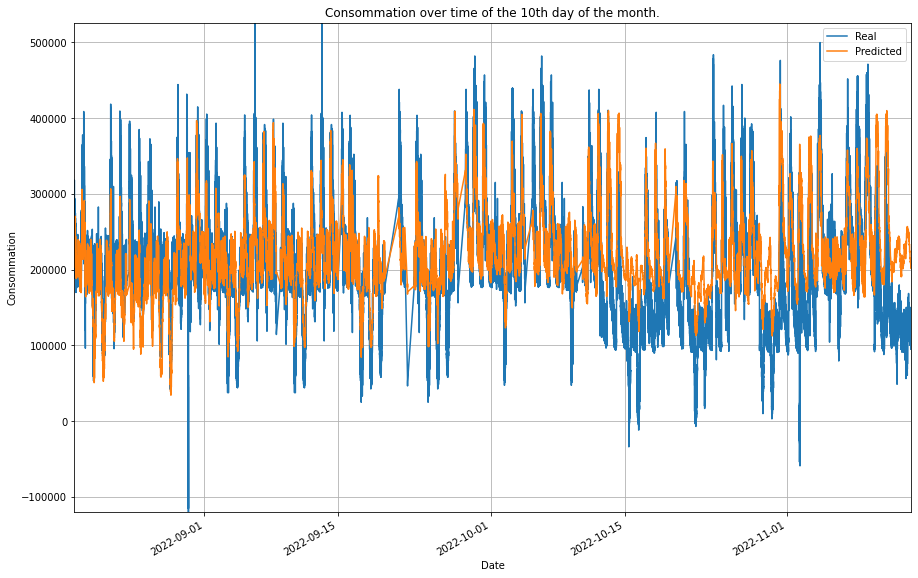

In [86]:
#plot the real value and the predicted value
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(y_test_['Date'], y_test_['Value'], label='Real')
ax.plot(y_test_['Date'], y_test_['Value_pred'], label='Predicted')
ax.set_title("Consommation over time of the 10th day of the month.")
ax.set_xlabel('Date')
ax.set_ylabel('Consommation')
ax.set_xlim(y_test_['Date'].min(), y_test_['Date'].max())
ax.set_ylim(y_test_['Value'].min(), y_test_['Value'].max())
ax.grid(True)
ax.legend()
fig.autofmt_xdate()
plt.show()

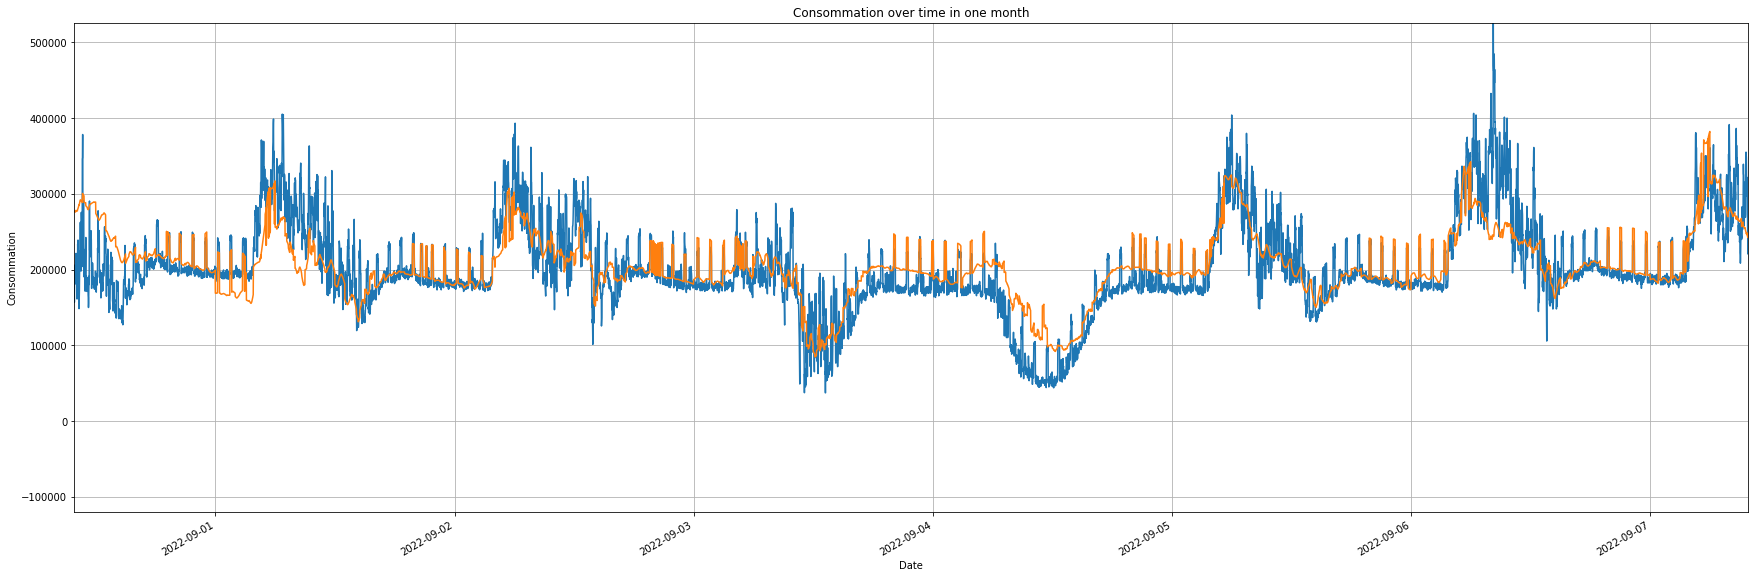

In [95]:
def plot_consommation_over_time_zoomed_graph():
    fig, ax = plt.subplots(figsize=(30, 10))
    
    ax.plot(y_test_['Date'], y_test_['Value'], label='Real')
    ax.plot(y_test_['Date'], y_test_['Value_pred'], label='Predicted')
    ax.set_title('Consommation over time in one month')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    
    ax.set_xlim(y_test_['Date'].min()+ pd.Timedelta(days=13) , y_test_['Date'].min()+ pd.Timedelta(days=20))
    ax.set_ylim(y_test_['Value'].min(), y_test_['Value'].max())
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_zoomed_graph()

# Modeling with RNN LTSM

In [66]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.preprocessing import MinMaxScaler

ModuleNotFoundError: No module named 'tensorflow.python'

In [70]:
target_column = ['Value']
predictors = list(set(list(new_df.columns)) - set(target_column))


X = new_df[predictors]
y = new_df[target_column]
# Split into 70% train and 30% test not random to keep the time order
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [71]:
#create new datafram X_train and X-test without column date
X_train_ = X_train.drop(['Date'], axis=1)
X_test_ = X_test.drop(['Date'], axis=1)
X_train_.shape

(238718, 22)

In [72]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_ = scaler.fit_transform(X_train_)
X_test_ = scaler.transform(X_test_)


In [79]:
def create_model():
    model = Sequential()
    model.add(LSTM(units=128, input_shape = (X_train_.shape[1], 1)))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.compile(loss='mse', optimizer='adam')
    return model

In [80]:
# create model
model = create_model()

# fit model
model.fit(X_train_, y_train, epochs=10, batch_size=1, verbose=1)



Epoch 1/10
151782/238718 [==================>...........] - ETA: 59:49 - loss: 42525962240.0000

KeyboardInterrupt: 

In [ ]:
# evaluate model
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, sqrt(trainScore)))
testScore = model.evaluate(X_test_, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, sqrt(testScore)))

In [72]:
from keras.preprocessing import sequence 
from keras.models import Sequential 
from keras.layers import Dense, Embedding 
from keras.layers import LSTM 
from keras.datasets import imdb

ModuleNotFoundError: No module named 'tensorflow.python'

In [74]:
pip install tensorflow.python

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow.python (from versions: none)
ERROR: No matching distribution found for tensorflow.python


In [76]:
pip install tensorflow

  Using cached tensorflow-2.11.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.11.0-cp310-cp310-win_amd64.whl (266.3 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\Kelyan\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths



In [73]:
import tensorflow.python

ModuleNotFoundError: No module named 'tensorflow.python'

In [71]:
pip install keras

Note: you may need to restart the kernel to use updated packages.
